# ePSproc: auto-gen template development
05/11/19

# Set-up

## Load modules

In [1]:
import sys
import os
import datetime
import numpy as np

# For module testing, include path to module here, otherwise use global installation
# modPath = r'/home/paul/ePS_stuff/ePSprocDev/ePSproc'
# modPath = r'/home/femtolab/github/ePSproc/'
modPath = r'D:\code\github\ePSproc'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 


## Load data

In [2]:
# Load data from modPath\data
# TO REPLACE with passed arg, or just use working dir if template copied there.
dataPath = os.path.join(modPath, 'data', 'photoionization')
dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing
# dataPath = r'/home/paul/ePS_stuff/aniline/aniline_wf_0.1-10.1eV'
# dataFile = os.path.join(dataPath, 'aniline_wf_0.1-10.1eV_orb33_A2.inp.out')

In [3]:
jobInfo = ep.headerFileParse(dataFile)
molInfo = ep.molInfoParse(dataFile)

*** Job info from file header.

 ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2
 N2 X-state (3sg-1)
 E=0.1:1.0:50.1 (51 points)
 Fri Nov 30 08:47:52 EST 2018

*** Found orbitals
1   1 Ene =     -15.6719 Spin =Alpha Occup =   2.000000
2   2 Ene =     -15.6676 Spin =Alpha Occup =   2.000000
3   3 Ene =      -1.4948 Spin =Alpha Occup =   2.000000
4   4 Ene =      -0.7687 Spin =Alpha Occup =   2.000000
5   5 Ene =      -0.6373 Spin =Alpha Occup =   2.000000
6   6 Ene =      -0.6283 Spin =Alpha Occup =   2.000000
7   7 Ene =      -0.6283 Spin =Alpha Occup =   2.000000

*** Found atoms
Z =  7 ZS =  7 r =   0.0000000000   0.0000000000   0.5328050000
Z =  7 ZS =  7 r =   0.0000000000   0.0000000000  -0.5328050000


In [4]:
# Scan file(s) for various data types...

# For dir scan
# dataXS = ep.readMatEle(fileBase = dataPath, recordType = 'CrossSection')
# dataMatE = ep.readMatEle(fileBase = dataPath, recordType = 'DumpIdy')

# For single file
dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')
dataMatE = ep.readMatEle(fileIn = dataFile, recordType = 'DumpIdy')


*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of CrossSection file segments, (0 blank)
*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 102 DumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets o

# Job & molecule info


*** Job summary data
 ePS n2, batch n2_3sg_0.1-50.1eV, orbital A2
 N2 X-state (3sg-1)
 E=0.1:1.0:50.1 (51 points)
 Fri Nov 30 08:47:52 EST 2018

Electronic structure input: '/home/paul/ePS_stuff/n2/electronic_structure/n2_cc-pVQZ_geom.molden'
Initial state occ:	 [2 2 2 2 2 4]
Final state occ:	 [2 2 2 2 1 4]

*** Molecular structure



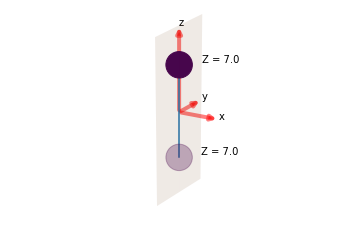

In [5]:
ep.jobSummary(jobInfo, molInfo)

# 1-photon ePS Cross-Sections
Plot 1-photon cross-sections and $beta_2$ parameters (for an unaligned ensemble) from ePS calculations. These are taken directly from the ePS output file, `CrossSection` segments. See the [ePS manual, `GetCro` command, for further details](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/GetCro.html).

## Cross-sections by symmetry & type

Types correspond to:

- 'L': length gauge results.
- 'V': velocity gauge results.
- 'M': mixed gauge results.

Symmetries correspond to allowed ionizing transitions for the molecular point group (IRs typically corresponding to (x,y,z) polarization geometries), see the [ePS manual for a list of symmetries](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/SymmetryLabels.html). Symmetry `All` corresponds to the sum over all allowed sets of symmetries.

Cross-section units are MBarn.

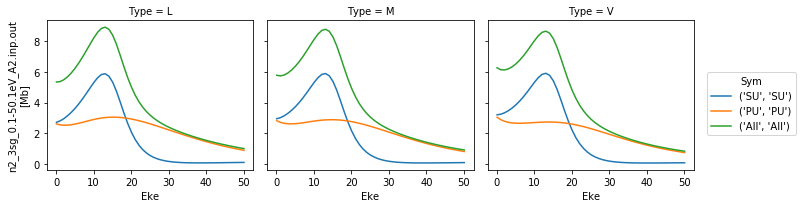

In [6]:
# Plot cross sections using Xarray functionality
# Set here to plot per file - should add some logic to combine files.
for data in dataXS:
    daPlot = data.sel(XC='SIGMA')
    daPlot.plot.line(x='Eke', col='Type')

## $\beta_{2}$ by symmetry & type

Types & symmetries as per cross-sections.  Normalized $\beta_{2}$ paramters, dimensionless.

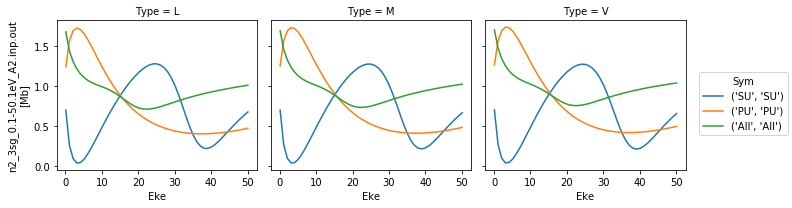

In [7]:
# Repeat for betas
for data in dataXS:
    daPlot = data.sel(XC='BETA')
    daPlot.plot.line(x='Eke', col='Type')

# Dipole matrix elements
For 1-photon ionization. These are taken directly from ePS `DumpIdy` segments. See the [ePS manual, `DumpIdy` command, for further details](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/DumpIdy.html).

In [8]:
# Set threshold for significance, only matrix elements with abs values > thres will be plotted
thres = 1e-2

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1519: RuntimeWarning:

invalid value encountered in remainder

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1520: RuntimeWarning:

invalid value encountered in greater

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1522: RuntimeWarning:

invalid value encountered in less



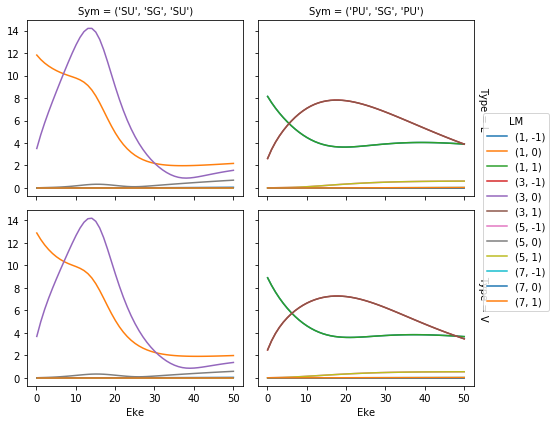

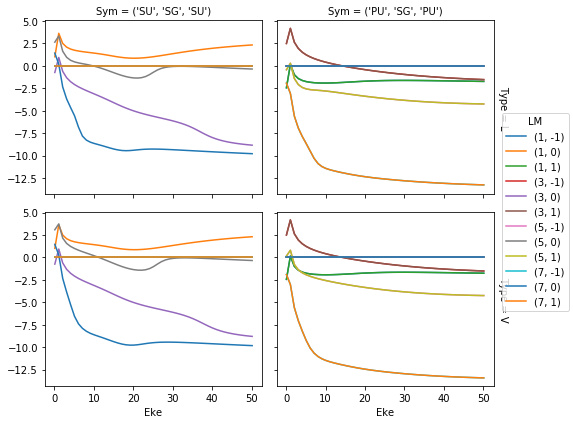

In [9]:
# Plot for each fie
for data in dataMatE:
    # Plot only values > theshold
    # daPlot = ep.matEleSelector(data, thres=thres, sq = True)  # threshold element-wise (will create gaps)
    # daPlot = ep.matEleSelector(data, thres=thres, dims = 'Eke', sq = True)  # threshold dim-wise (keeps all elements along a dim if 1 is above thres)
    daPlot = ep.matEleSelector(data * data.SF, thres=thres, dims = 'Eke', sq = True)  # Include scale-factor to sqrt(Mb)
    
    # Plot abs values, with faceting on symmetry (all mu)
    daPlot.sum('mu').squeeze().pipe(np.abs).plot.line(x='Eke', col='Sym', row='Type')
    
    # Plot phases
#     daPlot.data = np.angle(daPlot)  # No unwrap
    daPlot.data = np.unwrap(np.angle(daPlot), axis = 1)  # Works for unwrap along Eke, although would be better to use named axis here...
    daPlot.sum('mu').squeeze().plot.line(x='Eke', col='Sym', row='Type')
#     daPlot.sum('mu').squeeze().pipe(xr.ufuncs.angle).plot.line(x='Eke', col='Sym', row='Type')  # This works, but can't unwrap
    

# MFPADs

Calculated MF $\beta$ parameters, using ePS dipole matrix elements. These are calculated by `ep.mfblm()`, as a function of energy and polarization geometry. See [the ePSproc docs on `ep.mfblm()`](https://epsproc.readthedocs.io/en/latest/modules/epsproc.MFBLM.html) for further details, and [this demo notebook](https://epsproc.readthedocs.io/en/latest/ePSproc_BLM_calc_demo_Sept2019_rst/ePSproc_BLM_calc_demo_Sept2019.html).

In [10]:
# Set pol geoms - these correspond to (z,x,y) in molecular frame (relative to principle/symmetry axis)
pRot = [0, 0, np.pi/2]
tRot = [0, np.pi/2, np.pi/2]
cRot = [0, 0, 0]
eAngs = np.array([pRot, tRot, cRot]).T   # List form to use later, rows per set of angles

In [11]:
# Calculate for each fie & pol geom
# TODO - file logic, and parallelize
BLM = []
for data in dataMatE:
    BLM.append(ep.mfblmEuler(data, selDims = {'Type':'L'}, eAngs = eAngs, thres = thres, 
                             SFflag = True, verbose = 0))  # Run for all Eke, selected gauge only

In [12]:
# Save BLM data - defaults to working dir and 'ep_timestamp' file
# TODO - testing for array/multiple file case
for data in BLM:
    ep.writeXarray(data)

['Written to netCDF3 (re/im format)', 'D:\\code\\python\\jupyterNotebooks\\dev\\ePSproc\\ep_2019-11-08_13-23-31.nc']


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\xarray\backends\netCDF4_.py:256: FutureWarning:


Multi-dimensional array attributes are now deprecated.
Instead of silently flattening the array, an error will
be raised in the next release.



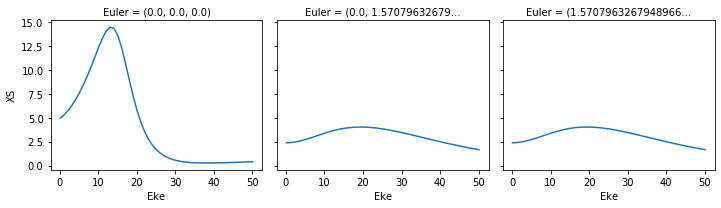

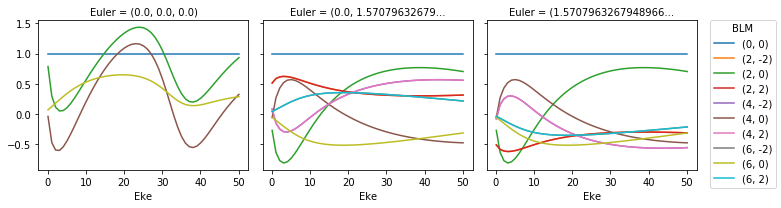

In [13]:
# Normalize and plot results
for BLMplot in BLM:
    # Plot unnormalized B00 only, real part
    # This is/should be in units of MBarn (TBC).
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
    BLMplot.XS.real.squeeze().plot.line(x='Eke', col='Euler');

    # Plot values normalised by B00 - now set in calculation function
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().plot.line(x='Eke', col='Euler');
    BLMplot = ep.matEleSelector(BLMplot, thres=thres, dims = 'Eke')
    BLMplot.real.squeeze().plot.line(x='Eke', col='Euler');

# Error & consistency checks

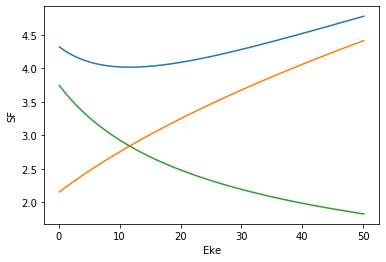

In [14]:
# Check SF values
for data in dataMatE:
    # Plot values, single plot
    data.SF.pipe(np.abs).plot.line(x='Eke')
    data.SF.real.plot.line(x='Eke')
    data.SF.imag.plot.line(x='Eke')
    
    # Plot values, facet plot
#     data.SF.pipe(np.abs).plot.line(x='Eke', col='Sym')


In [15]:
# Compare Cross-sections for different types

In [16]:
# Compare calculated BLMs for L and V types (dafault above for L)

# Calculate for each fie & pol geom, and compare.
BLMv = []
BLMdiff = []
for n, data in enumerate(dataMatE):
    BLMv.append(ep.mfblmEuler(data, selDims = {'Type':'V'}, eAngs = eAngs, thres = thres, 
                             SFflag = True, verbose = 0))  # Run for all Eke, selected gauge only
    
    BLMdiff.append(BLM[n] - BLMv[n])
    BLMdiff[n]['dXS'] = BLM[n].XS - BLMv[n].XS  # Set XS too, dropped in calc above


In [17]:
# Save BLM data - defaults to working dir and 'ep_timestamp' file
# TODO - testing for array/multiple file case
for data in BLMv:
    ep.writeXarray(data)

['Written to netCDF3 (re/im format)', 'D:\\code\\python\\jupyterNotebooks\\dev\\ePSproc\\ep_2019-11-08_13-24-37.nc']


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\xarray\backends\netCDF4_.py:256: FutureWarning:


Multi-dimensional array attributes are now deprecated.
Instead of silently flattening the array, an error will
be raised in the next release.



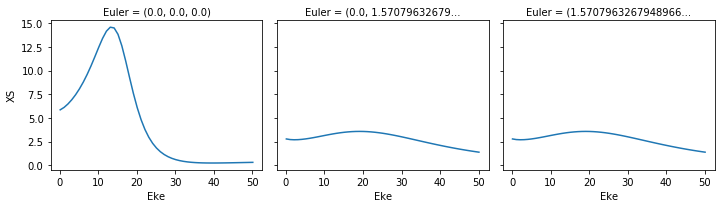

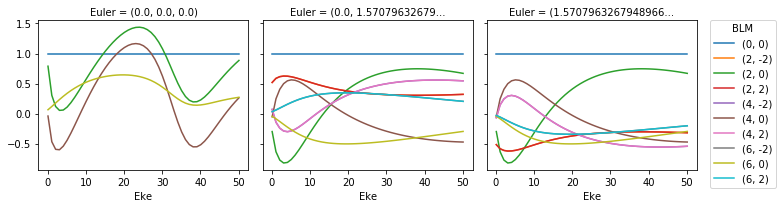

In [18]:
# Normalize and plot results
for BLMplot in BLMv:
    # Plot unnormalized B00 only, real part
    # This is/should be in units of MBarn (TBC).
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
    BLMplot.XS.real.squeeze().plot.line(x='Eke', col='Euler');

    # Plot values normalised by B00 - now set in calculation function
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().plot.line(x='Eke', col='Euler');
    BLMplot = ep.matEleSelector(BLMplot, thres=thres, dims = 'Eke')
    BLMplot.real.squeeze().plot.line(x='Eke', col='Euler');

Differences, L vs. V gauge BLMs
Max difference in BLMs (L-V): 0 (0.0747180751178185+4.390322879084188e-18j)


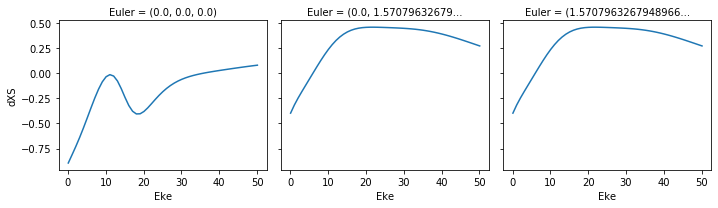

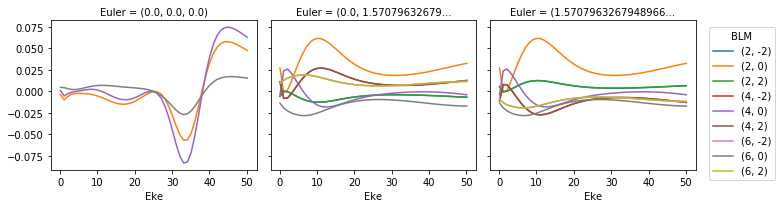

In [19]:
# Difference between 'L' and 'V' results
# NOTE - this currently drops XS

print('Differences, L vs. V gauge BLMs')

for BLMplot in BLMdiff:
    maxDiff = BLMplot.max()
    print(f'Max difference in BLMs (L-V): {0}', maxDiff.data)
    
    if np.abs(maxDiff) > thres:
        # Plot B00 only, real part
#         BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
        BLMplot.dXS.real.squeeze().plot.line(x='Eke', col='Euler');

        # Plot values normalised by B00 - now set in calculation function
#         BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().plot.line(x='Eke', col='Euler');
        BLMplot = ep.matEleSelector(BLMplot, thres=thres, dims = 'Eke')
        BLMplot.real.squeeze().plot.line(x='Eke', col='Euler');
    

Machine tolerance:  2.220446049250313e-16
Max imaginary value: 0 1.707418194777009e-16


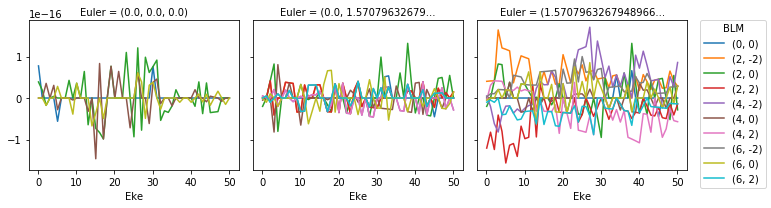

In [20]:
# Check imaginary components - should be around machine tolerance.
print('Machine tolerance: ', np.finfo(float).eps)
for BLMplot in BLM:
    maxImag = BLMplot.imag.max()
    print(f'Max imaginary value: {0}', maxImag.data)
    
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).imag.squeeze().plot.line(x='Eke', col='Euler');
    
    BLMplot = ep.matEleSelector(BLMplot, thres=thres, dims = 'Eke')
    BLMplot.imag.squeeze().plot.line(x='Eke', col='Euler');

# Version info

## Original job details

In [21]:
print(jobInfo['ePolyScat'][0])
print('Run: ' + jobInfo['Starting'][0].split('at')[1])

ePolyScat Version E3
Run:  2018-11-30  08:57:56.115 (GMT -0500)


## ePSproc details

In [22]:
templateVersion = '0.0.3'
templateDate = '08/11/19'

In [23]:
%load_ext version_information

In [24]:
%version_information epsproc, xarray

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.7.0
OS Windows 10 10.0.17763 SP0
epsproc 1.1.0 dev
xarray 0.12.3
Fri Nov 08 13:24:40 2019 Eastern Standard Time

In [25]:
print('Run: {}'.format(datetime.datetime.now()))
host = !hostname
print('Host: {}'.format(host[0]))

Run: 2019-11-08 13:24:40.450703
Host: Stimpy
